# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#appriopriate libraries to be used
!pip3 install tweepy==3.10.0

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import datetime
import os
import json
import re
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer


ModuleNotFoundError: No module named 'requests'

In [ ]:
# reading the twitter-archive-enhance.csv file downloaded into a data frame
df_archived = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:
df_archived.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
#creating folder 'new_folder in directory to store file
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)



In [ ]:
#using the url to download the file and store in the newly created folder
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL)

with open(os.path.join(folder_name, URL.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [ ]:
os.listdir(folder_name)

['image-predictions.tsv']

In [ ]:
# reading the second downloaded data in a data frame
df_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
df_pred.head(4).T

,0,1,2,3
tweet_id,666020888022790149,666029285002620928,666033412701032449,666044226329800704
jpg_url,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
img_num,1,1,1,1
p1,Welsh_springer_spaniel,redbone,German_shepherd,Rhodesian_ridgeback
p1_conf,0.465074,0.506826,0.596461,0.408143
p1_dog,True,True,True,True
p2,collie,miniature_pinscher,malinois,redbone
p2_conf,0.156665,0.074192,0.138584,0.360687
p2_dog,True,True,True,True
p3,Shetland_sheepdog,Rhodesian_ridgeback,bloodhound,miniature_pinscher


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

- For some reason, twitter failed to grant me access  to the Twitter API. 
- Therefore, i will continue to use the tweet-json.txt file provided. .




In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archived.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166:

1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 6968

Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714:

Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988:

Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262:

In [ ]:
#reading the tweet-json.txt file line by line into a dataframe

tweet_list = []

json_file = open('tweet-json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_list.append(twt)
    except:
        continue
        
json_file.close()

## Step 2: Create a dataframe

df_api = pd.DataFrame()

df_api['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
df_api['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
df_api['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
df_api['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
df_api['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))

In [ ]:
df_api.T

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,2352,2353
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,...,666058600524156928,666057090499244032,666055525042405380,666051853826850816,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
retweet_count,8853,6514,4328,8964,9774,3261,2158,16716,4429,7711,...,61,146,261,879,60,41,147,47,48,532
favorite_count,39467,33819,25461,42908,41048,20562,12041,56848,28226,32467,...,115,304,448,1253,136,111,311,128,132,2535
created_at,Tue Aug 01 16:23:56 +0000 2017,Tue Aug 01 00:17:27 +0000 2017,Mon Jul 31 00:18:03 +0000 2017,Sun Jul 30 15:58:51 +0000 2017,Sat Jul 29 16:00:24 +0000 2017,Sat Jul 29 00:08:17 +0000 2017,Fri Jul 28 16:27:12 +0000 2017,Fri Jul 28 00:22:40 +0000 2017,Thu Jul 27 16:25:51 +0000 2017,Wed Jul 26 15:59:51 +0000 2017,...,Mon Nov 16 01:01:59 +0000 2015,Mon Nov 16 00:55:59 +0000 2015,Mon Nov 16 00:49:46 +0000 2015,Mon Nov 16 00:35:11 +0000 2015,Mon Nov 16 00:30:50 +0000 2015,Mon Nov 16 00:24:50 +0000 2015,Mon Nov 16 00:04:52 +0000 2015,Sun Nov 15 23:21:54 +0000 2015,Sun Nov 15 23:05:30 +0000 2015,Sun Nov 15 22:32:08 +0000 2015
full_text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...,Here we have a majestic great white breaching ...,Meet Jax. He enjoys ice cream so much he gets ...,When you watch your owner call another dog a g...,This is Zoey. She doesn't want to be one of th...,This is Cassie. She is a college pup. Studying...,...,Here is the Rand Paul of retrievers folks! He'...,My oh my. This is a rare blond Canadian terrie...,Here is a Siberian heavily armored polar bear ...,This is an odd dog. Hard on the outside but lo...,This is a truly beautiful English Wilson Staff...,Here we have a 1949 1st generation vulpix. Enj...,This is a purebred Piers Morgan. Loves to Netf...,Here is a very happy pup. Big fan of well-main...,This is a western brown Mitsubishi terrier. Up...,Here we have a Japanese Irish Setter. Lost eye...


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### The following columns will be examined to fish-out data quality and tidinness issue with the datasets both by visual assessment and programatic assessment, after which they will be addressed to improve the quality of the data to proper analyse and visualize the data

#### 1. df_archived dataset(WerateDogs Twitter archive)
- tweet_id: this is a unique identifier of a tweet
- timestamp: column defines the UTC time when this Tweet was created
- source: Utility used to post the Tweet, as an HTML-formatted string
- text: The actual UTF-8 text of the status update
- rating numerator: dog rating numerator
- rating denominator: dog rating denominator
- name: names of dog
- doggo, floofer, puper and puppo: Dog personalities(dog_stage)

#### 2. df_pred dataset
- tweet_id: unique identifier of a tweet
- jpg_url: image URL
- p1: prediction 1 result
- p1_conf: proportion when p1 is true
- p1_dog: if the object recognized by the predictive model is a dog

#### 3. df_tweetjson dataset
- tweet_id:  unique identifier of a tweet
- retweet_count: number of times this Tweet has been retweeted
- folowers_count: (int64) number of followers this user account of this Tweet creator currently has

In [ ]:
# to get the general info of df_archived, the .info() method is used
df_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
df_archived.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
821,770293558247038976,NaN,NaN,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,None,None,None,None
493,813202720496779264,NaN,NaN,2016-12-26 02:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813202720...,11,10,None,doggo,None,None,None
219,850145622816686080,NaN,NaN,2017-04-07 00:38:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. He's making new friends. Jubila...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,None,None,None,None
2140,670003130994700288,NaN,NaN,2015-11-26 22:16:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raphael. He is a Baskerville Conquista...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670003130...,10,10,Raphael,None,None,None,None
1976,672995267319328768,NaN,NaN,2015-12-05 04:25:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pumpkin. He can look in two different ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672995267...,8,10,Pumpkin,None,None,None,None
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's a fluffball. 11/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254...,11,10,Curtis,None,None,pupper,None
1127,729838605770891264,7.291135e+17,4.196984e+09,2016-05-10 01:00:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Challenge completed"" \n(pupgraded to 12/10) h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/729838605...,12,10,None,None,None,None,None
127,867900495410671616,NaN,NaN,2017-05-26 00:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable. We only rate dogs. Please don't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
1863,675372240448454658,NaN,NaN,2015-12-11 17:51:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","The tail alone is 13/10. Great dog, better own...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675372240...,13,10,None,None,None,None,None


In [ ]:
# to have a glimpse of the non null values in a particular column, the code below is used
df_archived[~df_archived['in_reply_to_status_id'].isnull()]
# removal of '~' gives the null values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [ ]:
#checking if there is a rating numerator <= 0. 
df_archived[df_archived['rating_numerator'] <= 0].T # the use of .T is to transpose for better readeability of the output
# these particular tweet_id have to be taken note of 


,315,1016
tweet_id,835152434251116546,746906459439529985
in_reply_to_status_id,NaN,746885919387574272.0
in_reply_to_user_id,NaN,4196983835.0
timestamp,2017-02-24 15:40:31 +0000,2016-06-26 03:22:31 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,When you're so blinded by your systematic plag...,"PUPDATE: can't see any. Even if I could, I cou..."
retweeted_status_id,NaN,NaN
retweeted_status_user_id,NaN,NaN
retweeted_status_timestamp,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/835152434...,https://twitter.com/dog_rates/status/746906459...


In [ ]:
df_archived[df_archived['rating_denominator'] <= 0].T # these particular tweet_id have to be taken note of

,313
tweet_id,835246439529840640
in_reply_to_status_id,835245984028504064.0
in_reply_to_user_id,26259576.0
timestamp,2017-02-24 21:54:03 +0000
source,"<a href=""http://twitter.com/download/iphone"" r..."
text,@jonnysun @Lin_Manuel ok jomny I know you're e...
retweeted_status_id,NaN
retweeted_status_user_id,NaN
retweeted_status_timestamp,NaN
expanded_urls,NaN


#### Observations from df_archived:
##### DataType
- tweet_id data type of int is misleading as one would think of it as a measure. therefore it should be change to string
- timestamp is presented as a string whereas it should be of type datetime

##### Incomplete record of some columns(missing values). 
- these columns are short of the 2356 value counts
 - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
 
#### observing the data using pd or excel reveal the following issues:
- Non english charater spotted in the name column
- Name column contains unrealistic names with small letters and there are some with None(presumeable Nan was mistaken for that)
- since rating is suppose to be values > 0, implies ratings <= 0 is a quality issue 
- the datetime in the timespam column needs to be extracted. it looks messy


In [ ]:
#Assessing the df_pred dataframe
df_pred.sample(5).T

,1000,83,13,1177,1417
tweet_id,708711088997666817,667495797102141441,666082916733198337,737800304142471168,771171053431250945
jpg_url,https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg
img_num,2,1,1,1,3
p1,tennis_ball,Chihuahua,pug,malamute,Samoyed
p1_conf,0.912961,0.143957,0.489814,0.374682,0.978833
p1_dog,False,True,True,True,True
p2,German_short-haired_pointer,Christmas_stocking,bull_mastiff,Norwegian_elkhound,Pomeranian
p2_conf,0.052695,0.118651,0.404722,0.334853,0.012763
p2_dog,True,False,True,True,True
p3,Labrador_retriever,ski_mask,French_bulldog,limousine,Eskimo_dog


In [ ]:
df_pred['p1'] .value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
bonnet                  1
zebra                   1
silky_terrier           1
fiddler_crab            1
scorpion                1
Name: p1, Length: 378, dtype: int64

In [ ]:
#since p1_conf is the ratio of a particular bread with respect to the total breads, 
#this meanse it value should range from 1-0
#lets wriet a code to check that
df_pred.p1_conf.describe()


count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [ ]:
df_pred.info() # column seems to have no missing record. a deep look itno the data is neccesary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
 #to view a particular column info will be helpfull to detect issues with the data set.
df_pred['p1'].tolist() 

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'hen',
 'desktop_computer',
 'Italian_greyhound',
 'Maltese_dog',
 'three-toed_sloth',
 'ox',
 'golden_retriever',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'llama',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'German_shepherd',
 'Labrador_retriever',
 'miniature_poodle',
 'seat_belt',
 'Italian_greyhound',
 'snail',
 'English_setter',
 'miniature_schnauzer',
 'Maltese_dog',
 'Airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'golden_retriever',
 'Chesapeake_Bay_retriever',
 'jigsaw_puzzle',

#### Observations from df_pred dataset:
##### DataType
- tweet_id data type of int is misleading as one would think of it as a measure. therefore it should be change to string

#### observing the data using pd or excel reveal the following issues:
- P1 is not an informative heading for that column
- p1 column has a mixture of dog breeds in capital and small letters. its neccessary to make it consistent.



In [ ]:
# Assessing df_api dataset
df_api.head(5).T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
retweet_count,8853,6514,4328,8964,9774
favorite_count,39467,33819,25461,42908,41048
created_at,Tue Aug 01 16:23:56 +0000 2017,Tue Aug 01 00:17:27 +0000 2017,Mon Jul 31 00:18:03 +0000 2017,Sun Jul 30 15:58:51 +0000 2017,Sat Jul 29 16:00:24 +0000 2017
full_text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...


In [ ]:
#important to have an overview of the  counts, and datayype of each column
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   full_text       2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


### Quality issues based on programatic and visual assessment
1. Datatype of timestamp(str) should be change to datetime

2. Datatype of tweet_id should be changed from float to str beacuse the float signifies a measureable uantity

3. There are different number of records in each dataset. there is a need to drop columns which are of no interest such as 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

4. Name column contains invalid records and some names start with a small letters. All should be changed to begin with capital letters.

5. the name column contains None values insteadd of Nan. this should be changed aswell

6. p1, p2 and p3 of df_pred dataset have inconsistency in the records as capital and small letters are used . there is a need to make it consistent

7. The rating numerator and denominator should correspond what is in the full_text column. visual inspection of dataset reveal there are some rating in the full_text column which does not correspond to the ratingg_numerator and rating_denominator. There is therefore a need to adjust the full_text column as well as the rating numerator and rating denominator.


8. Evaluation of the dog columns reveal some columns contains None instead of Nan and there are cases where a dog has more than one dog stage. example of which include:
 - tweet_id: 854010172552949000 is both doggo and floofer
 - tweet_id: 808106460588765000 is both doggo and pupper
 - tweet_id: 801115127852503000 is both doggo and pupper
 - tweet_id: 781308096455073000 is both doggo, pupper





### Tidiness issues

-   All data set can be merge to one using the tweet_id
1. the df_archived columns of doggo, floafer, pupper and puppo reperesent some sort of dog personality(dog stage), therefore a new column can be created to to contain all of these data instead of having four seperate columns and for those with double stage, it will have aditional stage such as: doggo|pupper, doggo|puppo or doggo|floofer. it depends on the the combination though

2. It is important to create a new column called rating_ratio which will be the rating numerator divided by the rating denominator



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Make copies of original pieces of data


### Issue #0:

Creating a new dataset containg all three dataset before starting to clean

#### Define:
I will begin by merging all the three datasets into one

#### Code

In [ ]:
# merging the df_archived, df_pred and df_api datatsets to one

df_tweet_full = pd.merge(df_archived, df_pred, how = 'inner', on = ['tweet_id'] )
df_tweet_full = pd.merge(df_tweet_full, df_api, how = 'inner', on = ['tweet_id'])
df_tweet_full.to_csv('tweet_full.csv', encoding = 'utf-8')

#### Test

In [ ]:
df_tweet_full.shape, df_archived.shape, df_pred.shape,  df_api.shape


((2073, 32), (2356, 17), (2075, 12), (2354, 5))

the shape of the data reveal the datasets have been joined together

###### Before continueing with the cleaning steps on the joined data, its good to make a copy of the raw original dataset for reference

In [ ]:
#creating a copy of the original data
df_tweet_full_clean = df_tweet_full.copy()

In [ ]:
df_tweet_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue# 1:
DATA TYPE

#### Define
Changing datatype of timespam to datetime

#### Code

In [ ]:
df_tweet_full_clean['timestamp'] = pd.to_datetime(df_tweet_full_clean['timestamp'])

#### Test

In [ ]:
df_tweet_full_clean['timestamp'].dtype

datetime64[ns, UTC]

### Issue# 2:
DATA TYPE

#### Define
Changing datatype of tweet_id to str

#### Code

In [ ]:
df_tweet_full_clean['tweet_id'] = df_tweet_full_clean['tweet_id'].astype(str)

#### Test

In [ ]:
df_tweet_full_clean['tweet_id'].dtype

dtype('O')

### Issue# 3.
DROPPING unneccessary Columns.

In the data quality issue, this comes as quality issue number 8. it is address here nonetheless

#### Define
Due to the presence of so many Nan values in the in some columns, it is best to drop those columns entirelly as they do not have use in the dataset.
so we are dropping the columns: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'

### Code

In [ ]:
df_tweet_full_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [ ]:
df_tweet_full_clean.info() # this code shows there is no such columns any more in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   int64              
 6   rating_denominator  2073 non-null   int64              
 7   name                2073 non-null   object             
 8   doggo               2073 non-null   object             
 9   floofer             2073 non-null   object             
 10  pupper              2073 non-null   object             
 11  puppo               2073 non-null   object             
 12  jpg_url             2073 non-null 

### Issue # 4


### Define:
Addressing consitency in name, p1, p2, p3 records by capitailizing the first letters to have uniform record



### Code: 

In [ ]:
df_tweet_full_clean['name'] = [item.capitalize() for item in df_tweet_full_clean['name']]

df_tweet_full_clean['p1'] = [item.capitalize() for item in df_tweet_full_clean['p1']]

df_tweet_full_clean['p2'] = [item.capitalize() for item in df_tweet_full_clean['p2']]

df_tweet_full_clean['p3'] = [item.capitalize() for item in df_tweet_full_clean['p3']]

### Test

In [ ]:
df_tweet_full_clean[['name', 'p1', 'p2', 'p3']].sample(10)

,name,p1,p2,p3
407,Brandi,Irish_setter,Golden_retriever,Leonberg
850,Blanket,Samoyed,Pomeranian,White_wolf
445,Django,Tibetan_mastiff,German_shepherd,Leonberg
1655,None,Pomeranian,Pekinese,Persian_cat
2034,Jimothy,Ibizan_hound,Pembroke,West_highland_white_terrier
430,Cooper,Labrador_retriever,Staffordshire_bullterrier,American_staffordshire_terrier
1285,Phred,Kuvasz,Labrador_retriever,Ice_bear
1421,None,Triceratops,Chimpanzee,Mask
1322,Louis,Pomeranian,Pekinese,Keeshond
909,Buckley,Walker_hound,Beagle,English_foxhound


Items no longer contains words with small letters

### Issue# 5

### Define

Handling of invalidand incorrect values. the columns concerned here are names, doggo, floofer, pupper and puppo
- The None found in this columns should be changed to Nan

In [ ]:
#Change None to NaN
def change_None_to_Nan(item):
    if item == 'None':
        item = np.NaN
    return item

df_tweet_full_clean['name'] = [change_None_to_Nan(item) for item in df_tweet_full_clean['name']]

df_tweet_full_clean['doggo'] = [change_None_to_Nan(item) for item in df_tweet_full_clean['doggo']]
df_tweet_full_clean['floofer'] = [change_None_to_Nan(item) for item in df_tweet_full_clean['floofer']]
df_tweet_full_clean['pupper'] = [change_None_to_Nan(item) for item in df_tweet_full_clean['pupper']]
df_tweet_full_clean['puppo'] = [change_None_to_Nan(item) for item in df_tweet_full_clean['puppo']]

### Test

In [ ]:
df_tweet_full_clean[['name', 'doggo', 'floofer', 'pupper','puppo']].sample(20)

,name,doggo,floofer,pupper,puppo
696,Clark,NaN,NaN,NaN,NaN
251,Tobi,NaN,NaN,NaN,NaN
742,NaN,NaN,NaN,pupper,NaN
260,Poppy,NaN,NaN,NaN,NaN
1466,Penelope,NaN,NaN,NaN,NaN
228,Arlo,NaN,NaN,NaN,NaN
1452,Hector,NaN,NaN,pupper,NaN
781,Max,NaN,NaN,NaN,NaN
828,NaN,NaN,NaN,NaN,NaN
531,Mabel,NaN,NaN,NaN,NaN




All None records in those columns have equally been changed to Nan

### Issue# 6
 



### Define

Adjusting the rating_numerator and rating_denominator based on information found in the full_text column

### Code

In [ ]:
# the code bellow adjust the cell size to accomodate the text column so we can see the text info
pd.set_option('display.max_colwidth', -1)

# in order to fix the quality issue of number 6, it is neccessary to display the data once more to see the issue with the data.
# the correction will be focused on fixing tweets that include more than #/# expression and select one which will run throughout 
#the dataset 

df_tweet_full_clean[df_tweet_full_clean.full_text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',
                                                                                                          'full_text',
                                                                                                          'rating_denominator', 
                                                                                                          'rating_numerator']]

<ipython-input-40-8ceab93877d3>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
C:\Users\siray\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,full_text,rating_denominator,rating_numerator
454,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",10,12
616,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",10,12
825,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,9
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20,4
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1017,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1139,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,10,9
1229,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",10,4
1234,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10


the result from the code reveal there are 27 tweets that have more than one ##/## expression, some of the ratings are actual ratings (to different dogs) 
and some are not (for example: tweet_id: 740373189193256964). visually comparing the full_text with the rating denominator and numerator columns
one can tell that the rating columns take the first ##/## in the full_text column. 
This approach works fine for text with one ##/##, but results in erroneous rating for text with multiple ##/## expressions.

this issue therefore has to be fixed, This will be done by manually isolating the once with errors since the are few and  re-assign a new value to rating_numerator based on the second occurance of the ##/## pattern in each erroneous tweet and assign a value of 10

In [ ]:
# first thing is to Create a list of the tweets that need their rating denominator and numerator to be re-assigned
isolated_tweet_id = ['740373189193256964','722974582966214656','716439118184652801',
                   '695064344191721472','691483041324204033','682962037429899265','666287406224695296']

# a for loop is used to find and  re-assign numerator of the second ##/## occurance for the tweets in err_rating_twts

for twt in isolated_tweet_id:
    text = df_tweet_full_clean.full_text[df_tweet_full_clean.tweet_id == twt].iloc[0]
    df_tweet_full_clean.loc[df_tweet_full_clean.tweet_id == twt, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", text)
    # finaly the numerator will be assisgned a value of 10
    df_tweet_full_clean.loc[df_tweet_full_clean.tweet_id == twt, 'rating_denominator'] = 10

### Test

In [ ]:
df_tweet_full_clean[df_tweet_full_clean.full_text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',
                                                                                                          'full_text',
                                                                                                          'rating_denominator', 
                                                                                                          'rating_numerator']]

C:\Users\siray\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,full_text,rating_denominator,rating_numerator
454,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",10,12
616,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",10,12
825,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
876,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",10,14
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,10,13
1001,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,10,11
1017,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1139,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,10,9
1229,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",10,13
1234,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10


### Issue# 7
Data Tidiness issue is addressed here

### Define
there is a need to create a new column which will be the rating_numerator/rating_denominator called rating_ratio to better express the data

### Code

In [ ]:
# first thing will be to convert the rating_numerator and rating_denominator to float from int
df_tweet_full_clean['rating_numerator'] = df_tweet_full_clean['rating_numerator'].astype('float')
df_tweet_full_clean['rating_denominator'] = df_tweet_full_clean['rating_denominator'].astype('float')

# Create the new column

df_tweet_full_clean['rating_ratio'] = df_tweet_full_clean['rating_numerator']/df_tweet_full_clean['rating_denominator']

### Test

In [ ]:
df_tweet_full_clean[['rating_numerator','rating_denominator','rating_ratio']].sample(20)

,rating_numerator,rating_denominator,rating_ratio
1717,9.0,10.0,0.9
1095,10.0,10.0,1.0
735,10.0,10.0,1.0
168,14.0,10.0,1.4
1836,11.0,10.0,1.1
943,11.0,10.0,1.1
1843,10.0,10.0,1.0
535,12.0,10.0,1.2
148,13.0,10.0,1.3
1710,10.0,10.0,1.0


### Issue# 8
Addressing Dog personality columns. here a data quality issue is addressed along side a tidiness issue

### Define
creating of a new column to accomodate the deferent dog stages in to one. if there occur more than one stage, a new name name can have a combination of the stages such as doggo|pupper

#### Code

In [ ]:
# creating a new column called dog_stage to fill all the information found the four diffrent dog stages

df_tweet_full_clean['dog_stage'] = df_tweet_full_clean.doggo.fillna(df_tweet_full_clean.floofer.fillna
                                                        (df_tweet_full_clean.pupper.fillna(df_tweet_full_clean.puppo)))

### Test

In [ ]:
df_tweet_full_clean[['dog_stage', 'doggo', 'floofer', 'pupper', 'puppo']].T

,0,1,2,3,4,5,6,7,8,9,...,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072
dog_stage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doggo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,doggo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floofer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pupper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
puppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the above code does not solve all the issue as there are some tweets with two stages. T solve this, a part of the full_text column which has a combination of stages is extracted
and inserted in the stage column

In [ ]:
df_tweet_full_clean['dog_stage'] = df_tweet_full_clean['full_text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [ ]:
#we then create a list of the tweets where more than one stage is reference
doggo_pupper = df_tweet_full_clean.loc[(df_tweet_full_clean.doggo == "doggo") & (df_tweet_full_clean.pupper == "pupper")]['tweet_id'].tolist()
doggo_floofer = df_tweet_full_clean.loc[(df_tweet_full_clean.doggo == "doggo") & (df_tweet_full_clean.floofer == "floofer")]['tweet_id'].tolist()
doggo_puppo = df_tweet_full_clean.loc[(df_tweet_full_clean.doggo == "doggo") & (df_tweet_full_clean.puppo == "puppo")]['tweet_id'].tolist()

# The'dog_stage' for tweets that reference more than one stage is then updated
for twt in doggo_pupper:
    df_tweet_full_clean.loc[df_tweet_full_clean.tweet_id == twt,'dog_stage'] = 'doggo|pupper'
    
for twt in doggo_floofer:
    df_tweet_full_clean.loc[df_tweet_full_clean.tweet_id == twt,'dog_stage'] = 'doggo|floofer'
    
for twt in doggo_puppo:
    df_tweet_full_clean.loc[df_tweet_full_clean.tweet_id == twt,'dog_stage'] = 'doggo|puppo'


In [ ]:
# it also neccessary to update the type of the new column 'dog_stage' to cateogy

df_tweet_full_clean['dog_stage'] = df_tweet_full_clean['dog_stage'].astype('category')

### Test

the following test if all the issues above have been addressed 

In [ ]:
df_tweet_full_clean[(df_tweet_full_clean.doggo == "doggo") & (df_tweet_full_clean.pupper == "pupper")][['tweet_id','full_text',
                                                                                                        'dog_stage',
                                                                                                        'doggo',
                                                                                                       'floofer',
                                                                                                       'pupper',
                                                                                                       'puppo']]

,tweet_id,full_text,dog_stage,doggo,floofer,pupper,puppo
366,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo|pupper,doggo,NaN,pupper,NaN
429,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo|pupper,doggo,NaN,pupper,NaN
457,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo|pupper,doggo,NaN,pupper,NaN
464,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo|pupper,doggo,NaN,pupper,NaN
566,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo|pupper,doggo,NaN,pupper,NaN
627,775898661951791106,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo|pupper,doggo,NaN,pupper,NaN
665,770093767776997377,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo|pupper,doggo,NaN,pupper,NaN
722,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggo|pupper,doggo,NaN,pupper,NaN
780,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggo|pupper,doggo,NaN,pupper,NaN
871,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo|pupper,doggo,NaN,pupper,NaN


In [ ]:
df_tweet_full_clean.sample(20).T

,889,1531,328,1861,1146,2053,121,924,579,1919,295,1477,1388,156,1026,479,289,450,1484,2063
tweet_id,738537504001953792,677187300187611136,822975315408461824,670003130994700288,702598099714314240,666273097616637952,863553081350529029,731156023742988288,783334639985389568,668655139528511488,828408677031882754,679511351870550016,683852578183077888,854732716440526848,713175907180089344,798697898615730177,829141528400556032,803638050916102144,679111216690831360,666058600524156928
timestamp,2016-06-03 01:07:16+00:00,2015-12-16 18:03:28+00:00,2017-01-22 01:12:59+00:00,2015-11-26 22:16:09+00:00,2016-02-24 20:56:55+00:00,2015-11-16 15:14:19+00:00,2017-05-14 00:34:33+00:00,2016-05-13 16:15:54+00:00,2016-10-04 15:55:06+00:00,2015-11-23 04:59:42+00:00,2017-02-06 01:03:14+00:00,2015-12-23 03:58:25+00:00,2016-01-04 03:28:54+00:00,2017-04-19 16:25:34+00:00,2016-03-25 01:29:21+00:00,2016-11-16 01:23:12+00:00,2017-02-08 01:35:19+00:00,2016-11-29 16:33:36+00:00,2015-12-22 01:28:25+00:00,2015-11-16 01:01:59+00:00
source,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
text,This is Bayley. She fell asleep trying to escape her evil fence enclosure. 11/10 night night puppo https://t.co/AxSiqAKEKu,Here we see a Byzantine Rigatoni. Very aerodynamic. No eyes. Actually not windy here they just look like that. 9/10 https://t.co/gzI0m6wXRo,This is Albus. He's soaked as h*ck. Seems to have misplaced an ear as well. Still in good spirits tho. 12/10 would dry https://t.co/yUM8jYStuG,This is Raphael. He is a Baskerville Conquistador. Entertains at all the gatherings. 10/10 simply magnificent https://t.co/3NTykJmtHt,"This is Sansa. She's gotten too big for her chair. Not so smol anymore. 11/10 once a pupper, always a pupper https://t.co/IpAoztle2s",Can take selfies 11/10 https://t.co/ws2AMaNwPW,This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu,Say hello to Winifred. He is a Papyrus Hydrangea mix. Can tie shoes. 11/10 inspiring pup https://t.co/mwnBN6ZkPt,Th

In [ ]:
df_tweet_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   float64            
 6   rating_denominator  2073 non-null   float64            
 7   name                1496 non-null   object             
 8   doggo               80 non-null     object             
 9   floofer             8 non-null      object             
 10  pupper              221 non-null    object             
 11  puppo               24 non-null     object             
 12  jpg_url             2073 non-null 

In [ ]:
# Now lets delete(drop) the uncessary four stages which were originaly in the dataset


df_tweet_full_clean = df_tweet_full_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], 1)

In [ ]:
### test
df_tweet_full_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   float64            
 6   rating_denominator  2073 non-null   float64            
 7   name                1496 non-null   object             
 8   jpg_url             2073 non-null   object             
 9   img_num             2073 non-null   int64              
 10  p1                  2073 non-null   object             
 11  p1_conf             2073 non-null   float64            
 12  p1_dog              2073 non-null 

### Define
This is not really a quality issue nor is it a tidiness issue but for better viewing of the dataset, It makes sense to sort the dataframe for a better order

In [ ]:
# To have the data in a more pleasant form, lets sort the columns

columns_sorted = ['tweet_id','full_text','name','dog_stage','rating_ratio','created_at','retweet_count', 'favorite_count',
 'source','rating_numerator', 'rating_denominator', 'img_num', 'p1', 'p1_conf', 'p1_dog',
 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','timestamp','expanded_urls', 'jpg_url']

df_tweet_full_clean = df_tweet_full_clean[columns_sorted]


### Test

In [ ]:
df_tweet_full_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   object             
 1   full_text           2073 non-null   object             
 2   name                1496 non-null   object             
 3   dog_stage           337 non-null    category           
 4   rating_ratio        2073 non-null   float64            
 5   created_at          2073 non-null   object             
 6   retweet_count       2073 non-null   int64              
 7   favorite_count      2073 non-null   int64              
 8   source              2073 non-null   object             
 9   rating_numerator    2073 non-null   float64            
 10  rating_denominator  2073 non-null   float64            
 11  img_num             2073 non-null   int64              
 12  p1                  2073 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
# saving the data to csv
df_tweet_full_clean.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

In [ ]:
df = pd.read_csv('twitter_archive_master.csv')

In [ ]:
df.head()

,tweet_id,full_text,name,dog_stage,rating_ratio,created_at,retweet_count,favorite_count,source,rating_numerator,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,expanded_urls,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,1.3,Tue Aug 01 16:23:56 +0000 2017,8853,39467,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13.0,...,False,Bagel,0.085851,False,Banana,0.076110,False,2017-08-01 16:23:56+00:00,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,1.3,Tue Aug 01 00:17:27 +0000 2017,6514,33819,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13.0,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01 00:17:27+00:00,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,1.2,Mon Jul 31 00:18:03 +0000 2017,4328,25461,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12.0,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31 00:18:03+00:00,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,1.3,Sun Jul 30 15:58:51 +0000 2017,8964,42908,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13.0,...,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,2017-07-30 15:58:51+00:00,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,1.2,Sat Jul 29 16:00:24 +0000 2017,9774,41048,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:

befor going ahead to make any visualization for the data, it is important to have a idea(insight) about the dataset from which visualizations can equally be built.

1. what are most common dog name in the dataset

2. what is the summary statistics of the dog ratings 

3. How distributed are the various dog_stages within the dataset

### Insight# 1

In [ ]:
# Response to insiight 1: What are the most common dog names in the dataset
df.name.value_counts().nlargest(5)

A          55
Charlie    11
Penny      10
Tucker     10
Oliver     10
Name: name, dtype: int64

'A' is revealed to be the most common dog name followed by Charlie

### Insight# 2

In [ ]:
#Response to insight 2: what is the summary statistics of the dog ratings

df.rating_ratio.describe()

count    2073.00000
mean     1.17189   
std      3.98872   
min      0.00000   
25%      1.00000   
50%      1.10000   
75%      1.20000   
max      177.60000 
Name: rating_ratio, dtype: float64

more details on the summary statistics provided above: The code reveal there are a total of 2073 ratings in the dataset. The worst rate is 0, the best is 177.6 and a mean of 1.17. 


### Insight# 3

In [ ]:
dog_stage_dist = df.dog_stage.value_counts()
dog_stage_dist

pupper           227
doggo            66 
puppo            28 
doggo|pupper     11 
floofer          3  
doggo|puppo      1  
doggo|floofer    1  
Name: dog_stage, dtype: int64

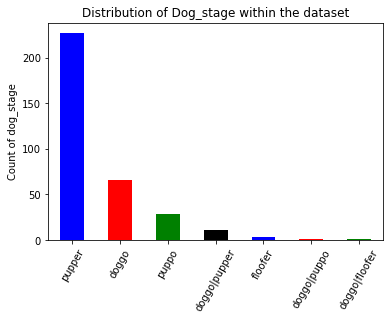

In [ ]:
#we can equally plot the aboe dog_stages to better visualize it 
dog_stage_dist.plot(kind='bar', color =['blue', 'red', 'green', 'black'], title = 'Distribution of Dog_stage within the dataset')
plt.xticks(rotation=60)
plt.ylabel('Count of dog_stage')
plt.show()

### Visualization

It will be intresting to see tweet creation as time passes. to do this,
1. i will creat two columns 'date' and 'tweet' to aggregate  'datetime'
2. create a new dataframe with the two columns grouped by 'date'
3. smothing of the line using moving average and finally ploting the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   full_text           2073 non-null   object 
 2   name                1496 non-null   object 
 3   dog_stage           337 non-null    object 
 4   rating_ratio        2073 non-null   float64
 5   created_at          2073 non-null   object 
 6   retweet_count       2073 non-null   int64  
 7   favorite_count      2073 non-null   int64  
 8   source              2073 non-null   object 
 9   rating_numerator    2073 non-null   float64
 10  rating_denominator  2073 non-null   float64
 11  img_num             2073 non-null   int64  
 12  p1                  2073 non-null   object 
 13  p1_conf             2073 non-null   float64
 14  p1_dog              2073 non-null   bool   
 15  p2                  2073 non-null   object 
 16  p2_con

I realise the datatype for timestamp has chnaged to object. i need to change it back to datetime

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   full_text           2073 non-null   object             
 2   name                1496 non-null   object             
 3   dog_stage           337 non-null    object             
 4   rating_ratio        2073 non-null   float64            
 5   created_at          2073 non-null   object             
 6   retweet_count       2073 non-null   int64              
 7   favorite_count      2073 non-null   int64              
 8   source              2073 non-null   object             
 9   rating_numerator    2073 non-null   float64            
 10  rating_denominator  2073 non-null   float64            
 11  img_num             2073 non-null   int64              
 12  p1                  2073 non-null 

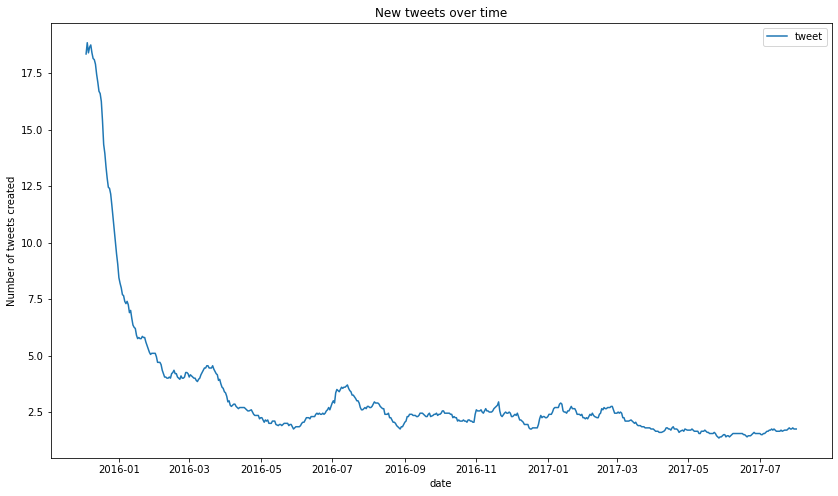

In [ ]:
# creation of two columns ('date' and 'tweet') to aggregate the datetime
df['date'] = df['timestamp'].dt.date

df['tweet'] = 1

# this code Creates a new dataframe with 2 columns, gruped by date
new_df = df[['date', 'tweet']].groupby(['date']).sum() 

# Use moving averages to smooth the line
new_df['tweet'] = new_df['tweet'].rolling(window=20).mean()

# Plot
new_df.plot(figsize=(14, 8), title='New tweets over time')
plt.ylabel('Number of tweets created')
plt.show()

#### The following resources have been used in this project

- https://twitter.com/dog_rates
- https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://docs.python.org/3/howto/regex.html
    